<a href="https://colab.research.google.com/github/Javiour2003/Compute_Tasks/blob/main/Jatin_Jadhav_Boosting_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is aksed from you. 


ALL THE BEST!

Importing necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [2]:
df = pd.read_csv('/content/AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


In [72]:
df.duplicated().sum()

0

Plot the data: 

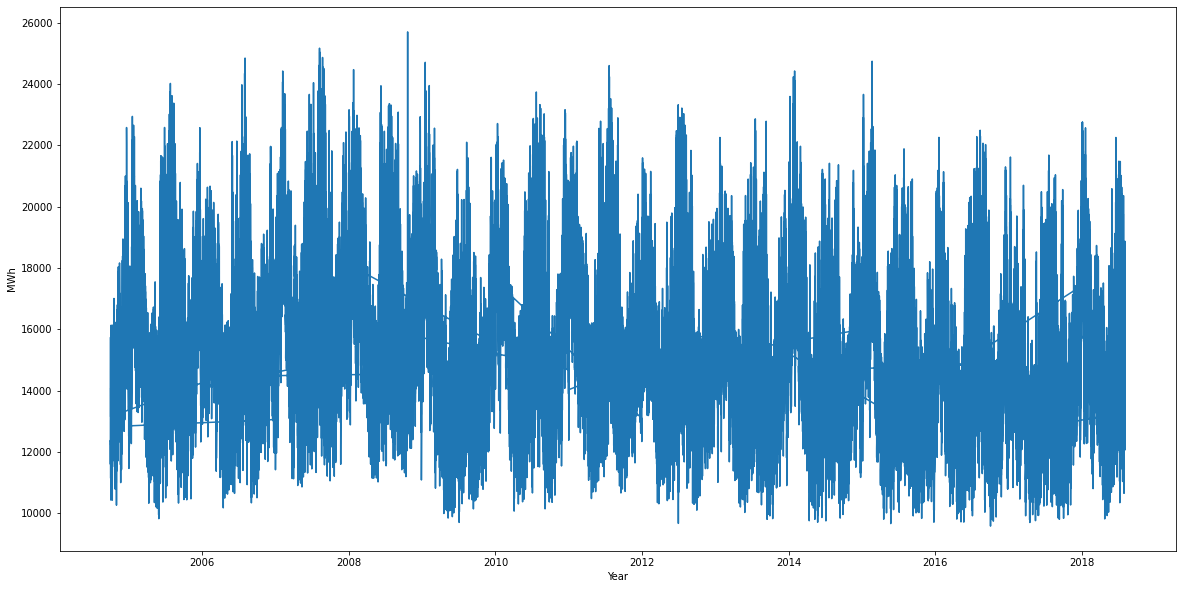

In [3]:
plt.figure(figsize=(20,10))
plt.plot(df)
plt.xlabel("Year")
plt.ylabel("MWh")
plt.show;

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [4]:
train = df.loc[df.index <  '01-01-2016']
test = df.loc[df.index >=  '01-01-2016']

plot the train and test data

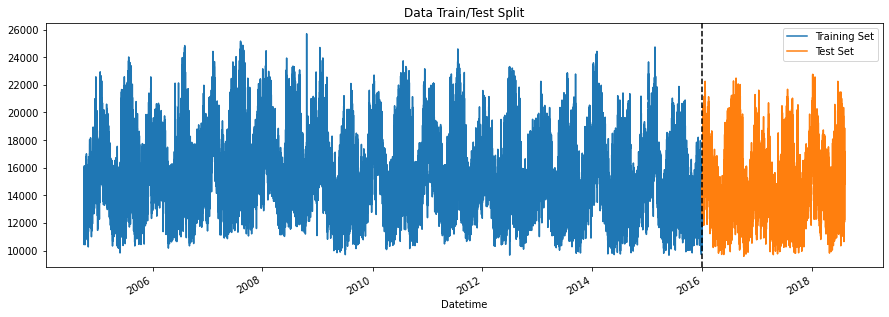

In [5]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2016', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

Plot data for a random week AND day, to visualize weekly and daily variations in data

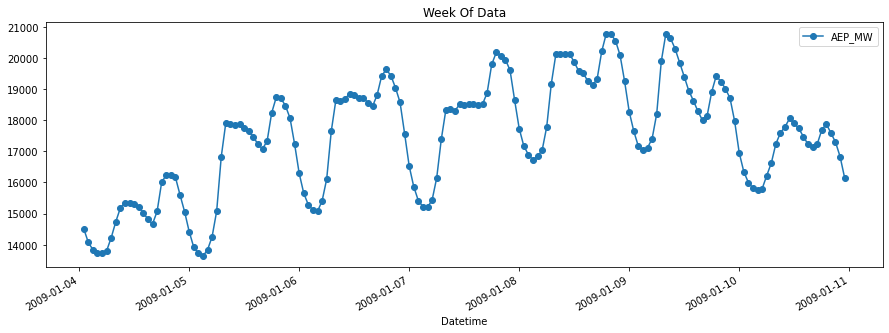

In [36]:
x=df.loc[(df.index > '01-04-2009') & (df.index < '01-11-2009')] 
x.plot(figsize=(15, 5), title='Week Of Data',marker='o')
plt.show()

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [48]:
def create_fet(data):
    data = data.copy()
    data["hour"] = data.index.hour
    data["dayofweek"] = data.index.dayofweek
    data["quarter"] = data.index.quarter
    data["month"] = data.index.month
    data["year"] = data.index.year
    data["dayofyear"] = data.index.dayofyear
    return data

df = create_fet(df)
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1


Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

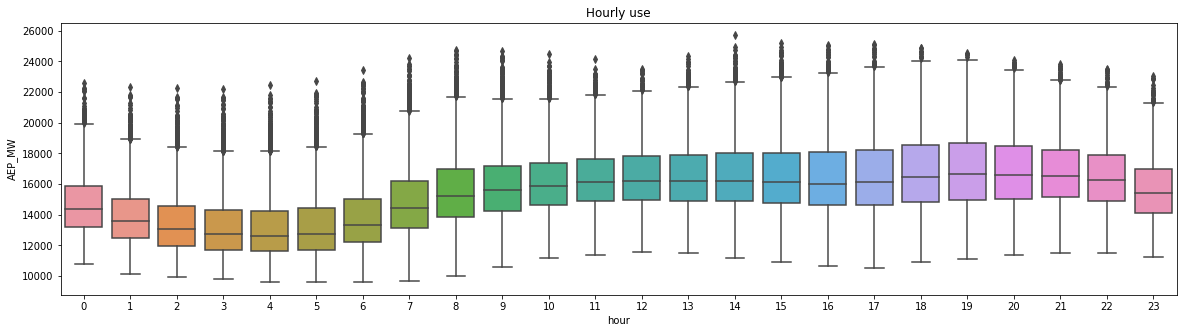

In [50]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="hour",y="AEP_MW")
plt.title("Hourly use");

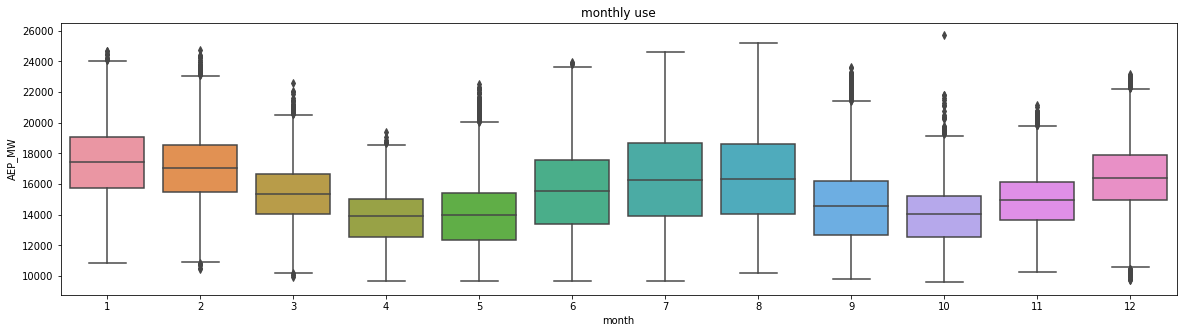

In [54]:
from pandas.io.gbq import annotations
plt.figure(figsize=(20,5))
sns.boxplot(data=df,x="month",y="AEP_MW")
plt.title("monthly use");

## Model Creation andEestimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learnning rate as 0.01 

In [76]:
train = create_fet(train)
test = create_fet(test)
x_train = train.drop(["AEP_MW"],axis=1)
y_train = train["AEP_MW"]

x_test = test.drop(["AEP_MW"],axis=1)
y_test = test["AEP_MW"]

model = xgb.XGBRegressor(n_estimators=1000,early_stopping_round=50,learning_rate=0.01)
model.fit(x_train,y_train,eval_set=[(x_train,y_train),(x_test,y_test)],verbose=100)
          

[15:24:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:15720	validation_1-rmse:14831.8
[100]	validation_0-rmse:6010.65	validation_1-rmse:5184.93
[200]	validation_0-rmse:2708.6	validation_1-rmse:2237.91
[300]	validation_0-rmse:1765.04	validation_1-rmse:1741.3
[400]	validation_0-rmse:1525.16	validation_1-rmse:1730.96
[500]	validation_0-rmse:1442.44	validation_1-rmse:1746.14
[600]	validation_0-rmse:1401.82	validation_1-rmse:1752.09
[700]	validation_0-rmse:1371.26	validation_1-rmse:1752.95
[800]	validation_0-rmse:1347.8	validation_1-rmse:1746.29
[900]	validation_0-rmse:1330.9	validation_1-rmse:1743.06
[999]	validation_0-rmse:1317.28	validation_1-rmse:1741.13


XGBRegressor(early_stopping_round=50, learning_rate=0.01, n_estimators=1000)

Predict values for the testing set using the model and plot them

In [77]:
y_pred = model.predict(x_test)

Use RMSE to find out the accuracy of your model

In [78]:
np.sqrt(mean_squared_error(y_test,y_pred))

1741.1275057921257

In [79]:
r2_score(y_test,y_pred)

0.5061244509753926

Find the importance of each feature use

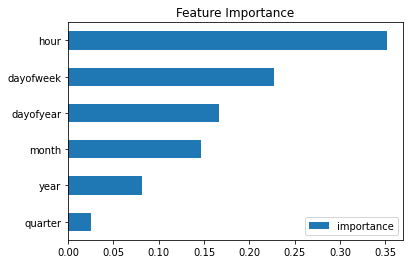

In [86]:
df2=df.drop(["AEP_MW"],axis=1)
fi = pd.DataFrame(data=model.feature_importances_,
             index=df2.columns,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()